In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Read data

In [2]:
data = pd.read_csv('Application_Data.csv')

In [3]:
data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


# 2. Describe data

In [4]:
data.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

# 3. Clean up data:

In [6]:
# define function
def str_strip(df, lst):
    for i in lst:
        df[i] =  df[i].apply(lambda x:x.strip())
    return df

# apply the function to the dataset
lst = ['Applicant_Gender','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']
data = str_strip(data,lst)

In [7]:
# Check for duplication
data.duplicated().sum()

0

In [8]:
# Check for NaN values:
data.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

# 4. Data Analysis

## 4.1. Overview

In [9]:
#gender
data['Applicant_Gender'].value_counts(normalize=True)

F    0.621896
M    0.378104
Name: Applicant_Gender, dtype: float64

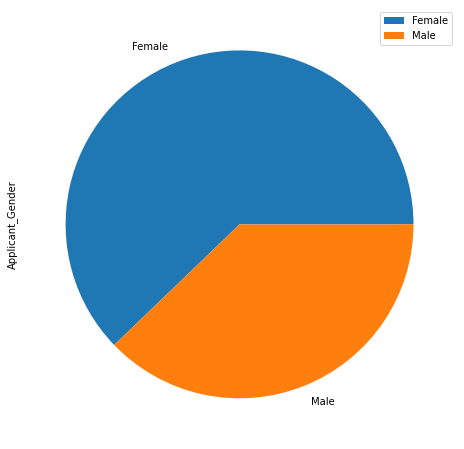

In [22]:
#plotting gender
gender = data['Applicant_Gender'].value_counts()
gender.plot.pie(figsize=(8, 8), labels = ['Female','Male'])
plt.legend(['Female','Male'])
plt.show()

In [73]:
#owner car
data['Owned_Car'].value_counts(normalize=True)

0    0.581622
1    0.418378
Name: Owned_Car, dtype: float64

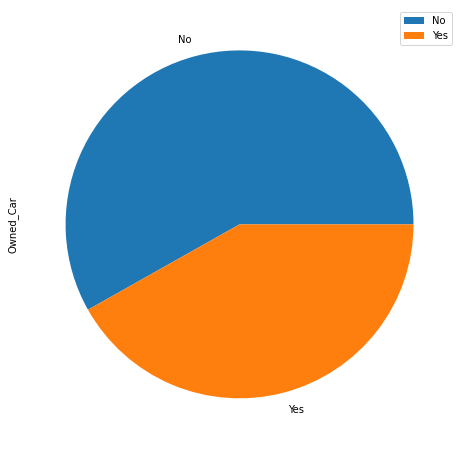

In [26]:
#plotting owner car
car = data['Owned_Car'].value_counts()
car.plot.pie(figsize=(8, 8), labels = ['No','Yes'])
plt.legend(['No','Yes'])
plt.show()

In [75]:
# Owned Realty
data['Owned_Realty'].value_counts(normalize=True)

1    0.654927
0    0.345073
Name: Owned_Realty, dtype: float64

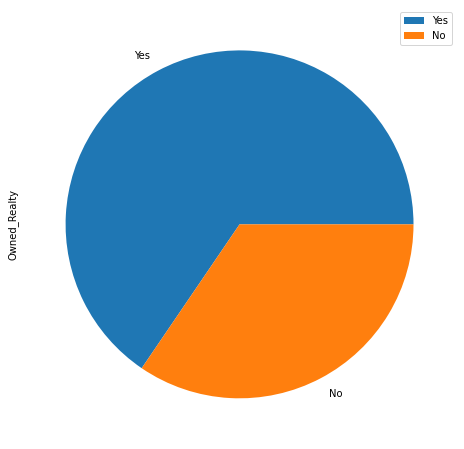

In [28]:
#plotting owned realty
prop = data['Owned_Realty'].value_counts()
prop.plot.pie(figsize=(8, 8), labels = ['Yes','No'])
plt.legend(['Yes','No'])
plt.show()

In [77]:
# Total Children        
data['Total_Children'].value_counts(normalize=True)

0    0.633079
1    0.243473
2    0.108047
3    0.012416
4    0.002268
5    0.000716
Name: Total_Children, dtype: float64

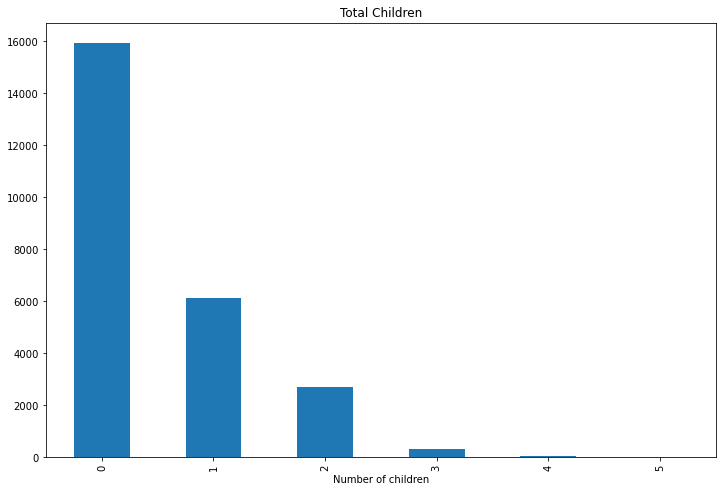

In [36]:
#plotting chilren
child = data['Total_Children'].value_counts()
child.plot.bar(figsize=(12, 8))
plt.title('Total Children')
plt.xlabel('Number of children')
plt.show()

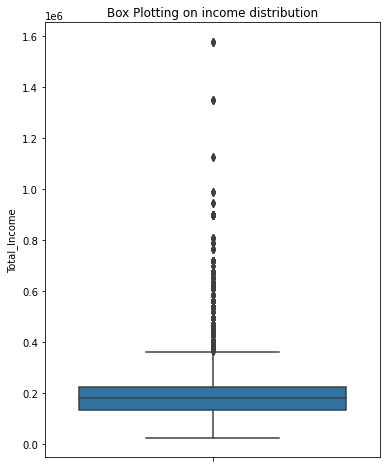

In [79]:
# Total Income
figure = plt.figure(figsize=(6,8))
sns.boxplot(y=data['Total_Income'])
plt.title('Box Plotting on income distribution')
plt.ylim()
plt.show()

In [80]:
#Income Type           
data['Income_Type'].value_counts(normalize=True)

Working                 0.621458
Commercial associate    0.280643
State servant           0.096983
Pensioner               0.000517
Student                 0.000398
Name: Income_Type, dtype: float64

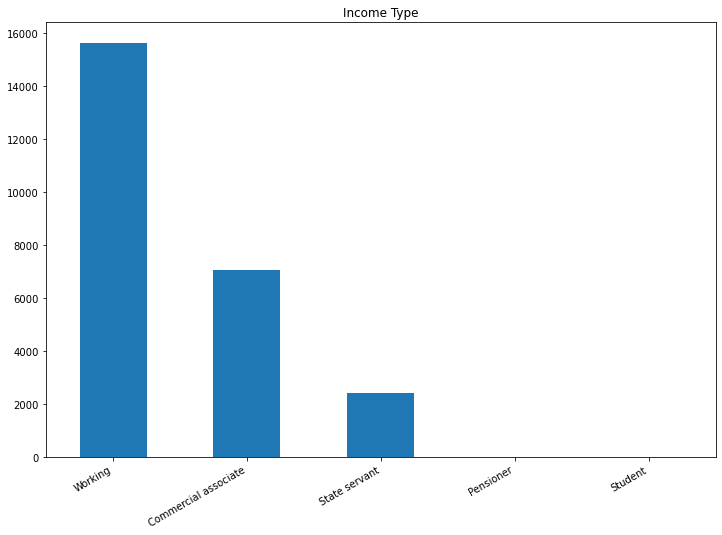

In [37]:
#plotting income
income = data['Income_Type'].value_counts()
income.plot.bar(figsize=(12, 8))
plt.title('Income Type')
plt.xticks(rotation=30, ha='right')
plt.show()

In [82]:
#Education_Type 
data['Education_Type'].value_counts(normalize=True)

Secondary / secondary special    0.668656
Higher education                 0.283827
Incomplete higher                0.039518
Lower secondary                  0.007442
Academic degree                  0.000557
Name: Education_Type, dtype: float64

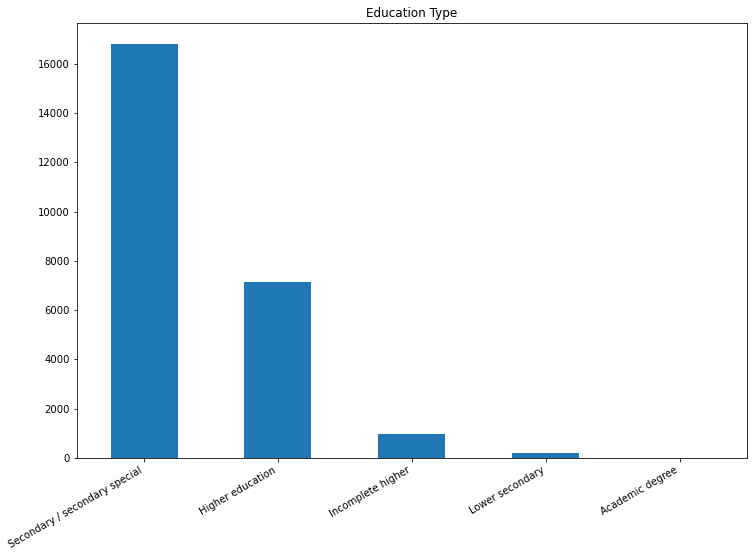

In [39]:
#plotting income
edu = data['Education_Type'].value_counts()
edu.plot.bar(figsize=(12, 8))
plt.title('Education Type')
plt.xticks(rotation=30, ha='right')
plt.show()

In [84]:
#Family_Status
data['Family_Status'].value_counts(normalize=True)

Married                 0.696713
Single / not married    0.137058
Civil marriage          0.084885
Separated               0.058262
Widow                   0.023082
Name: Family_Status, dtype: float64

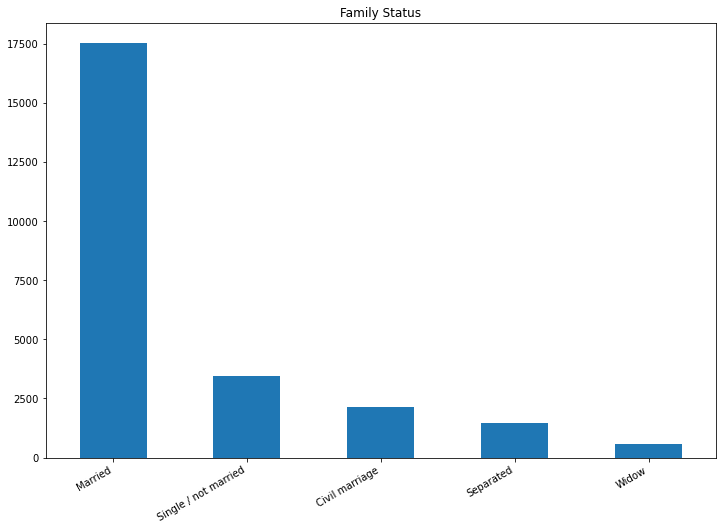

In [41]:
#plotting income
marr = data['Family_Status'].value_counts()
marr.plot.bar(figsize=(12, 8))
plt.title('Family Status')
plt.xticks(rotation=30, ha='right')
plt.show()

In [86]:
#Housing_Type
data['Housing_Type'].value_counts(normalize=True)

House / apartment      0.879338
With parents           0.056909
Municipal apartment    0.032315
Rented apartment       0.017471
Office apartment       0.007919
Co-op apartment        0.006049
Name: Housing_Type, dtype: float64

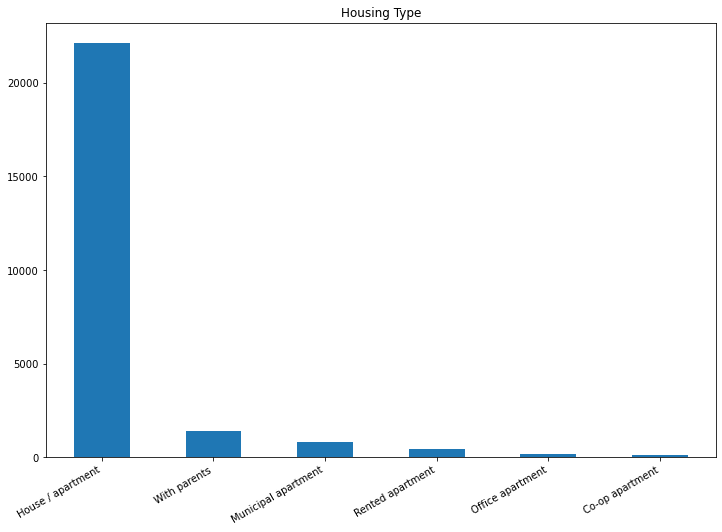

In [42]:
#plotting housing
house = data['Housing_Type'].value_counts()
house.plot.bar(figsize=(12, 8))
plt.title('Housing Type')
plt.xticks(rotation=30, ha='right')
plt.show()

In [88]:
#Owned_Mobile_Phone
data['Owned_Mobile_Phone'].value_counts(normalize=True)

1    1.0
Name: Owned_Mobile_Phone, dtype: float64

In [89]:
#Owned_Work_Phone
data['Owned_Work_Phone'].value_counts(normalize=True)

0    0.726242
1    0.273758
Name: Owned_Work_Phone, dtype: float64

In [90]:
#Owned_Phone
data['Owned_Phone'].value_counts(normalize=True)

0    0.707259
1    0.292741
Name: Owned_Phone, dtype: float64

In [91]:
#Owned_Email 
data['Owned_Email'].value_counts(normalize=True)

0    0.899316
1    0.100684
Name: Owned_Email, dtype: float64

In [92]:
#Job_Title
data['Job_Title'].value_counts(normalize=True)

Laborers                 0.247174
Core staff               0.142908
Sales staff              0.138690
Managers                 0.119866
Drivers                  0.084965
High skill tech staff    0.055038
Accountants              0.049387
Medicine staff           0.048034
Cooking staff            0.026067
Security staff           0.023559
Cleaning staff           0.021848
Private service staff    0.013690
Low-skill Laborers       0.006964
Waiters/barmen staff     0.006885
Secretaries              0.006009
HR staff                 0.003383
Realty agents            0.003144
IT staff                 0.002388
Name: Job_Title, dtype: float64

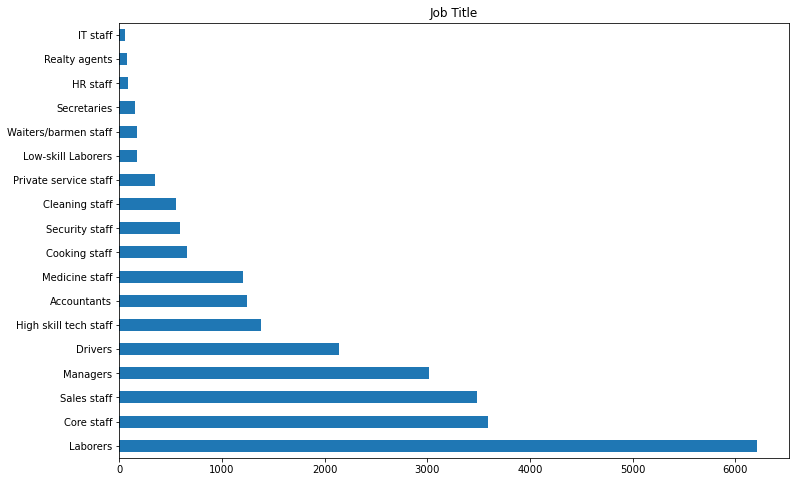

In [45]:
# Plotting job title
job = data['Job_Title'].value_counts()
job.plot.barh(figsize=(12, 8))
plt.title('Job Title')
plt.show()

In [93]:
#Total_Family_Members 
data['Total_Family_Members'].value_counts(normalize=True)

2    0.505293
3    0.207577
1    0.169651
4    0.102515
5    0.012217
6    0.002030
7    0.000716
Name: Total_Family_Members, dtype: float64

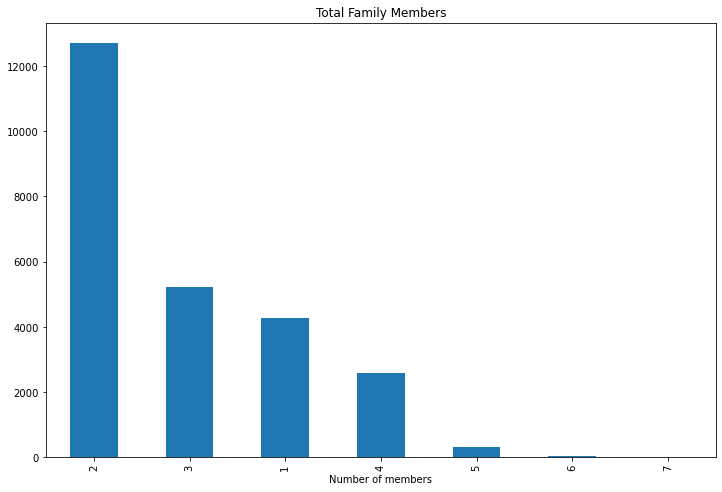

In [48]:
# Plotting job title
mem = data['Total_Family_Members'].value_counts()
mem.plot.bar(figsize=(12, 8))
plt.title('Total Family Members')
plt.xlabel('Number of members')
plt.show()

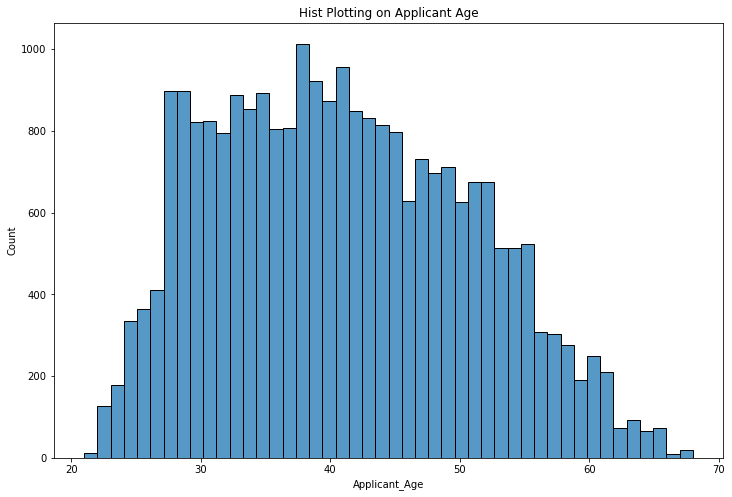

In [94]:
#Applicant_Age 
figure = plt.figure(figsize=(12,8))
sns.histplot(data['Applicant_Age'])
plt.title('Hist Plotting on Applicant Age')
plt.show()

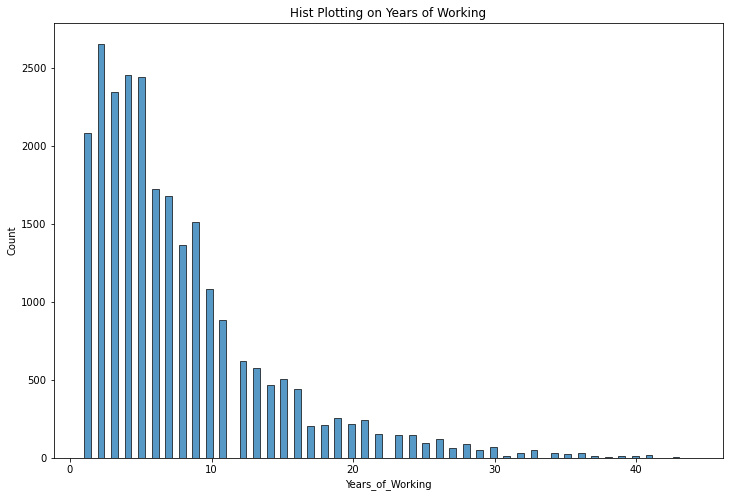

In [95]:
#Years_of_Working
figure = plt.figure(figsize=(12,8))
sns.histplot(data['Years_of_Working'])
plt.title('Hist Plotting on Years of Working')
plt.show()

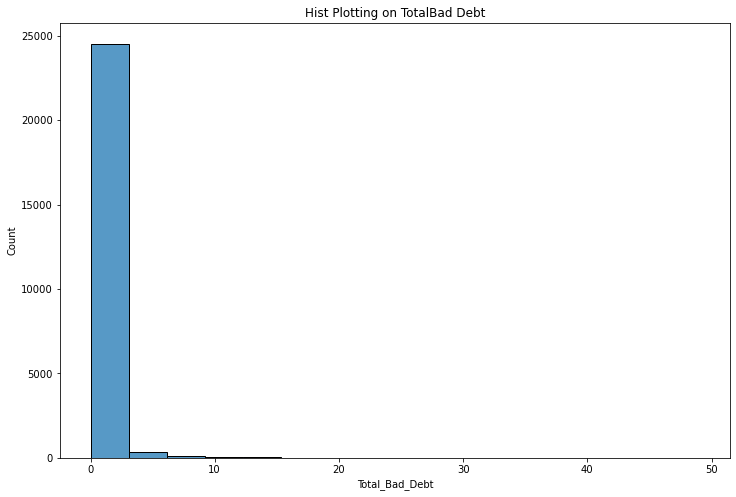

In [96]:
#Total_Bad_Debt
figure = plt.figure(figsize=(12,8))
sns.histplot(data['Total_Bad_Debt'])
plt.title('Hist Plotting on TotalBad Debt')
plt.show()

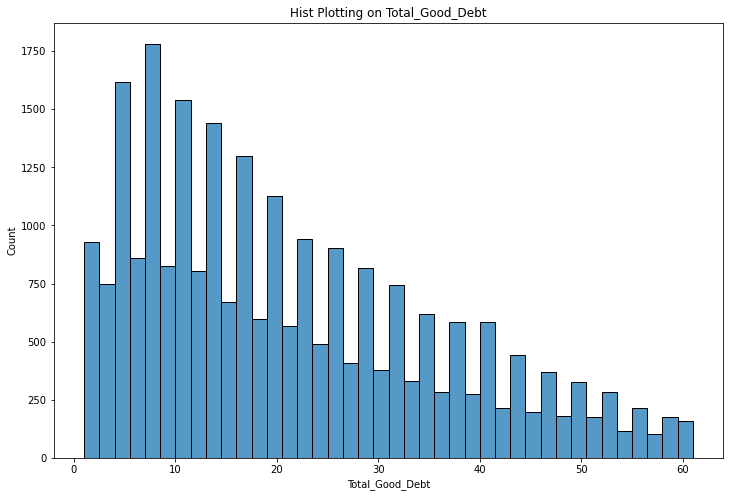

In [97]:
#Total_Good_Debt
figure = plt.figure(figsize=(12,8))
sns.histplot(data['Total_Good_Debt'])
plt.title('Hist Plotting on Total_Good_Debt')
plt.show()

In [98]:
#Status
data['Status'].value_counts(normalize=True)

1    0.995185
0    0.004815
Name: Status, dtype: float64

## 4.2 Correlation

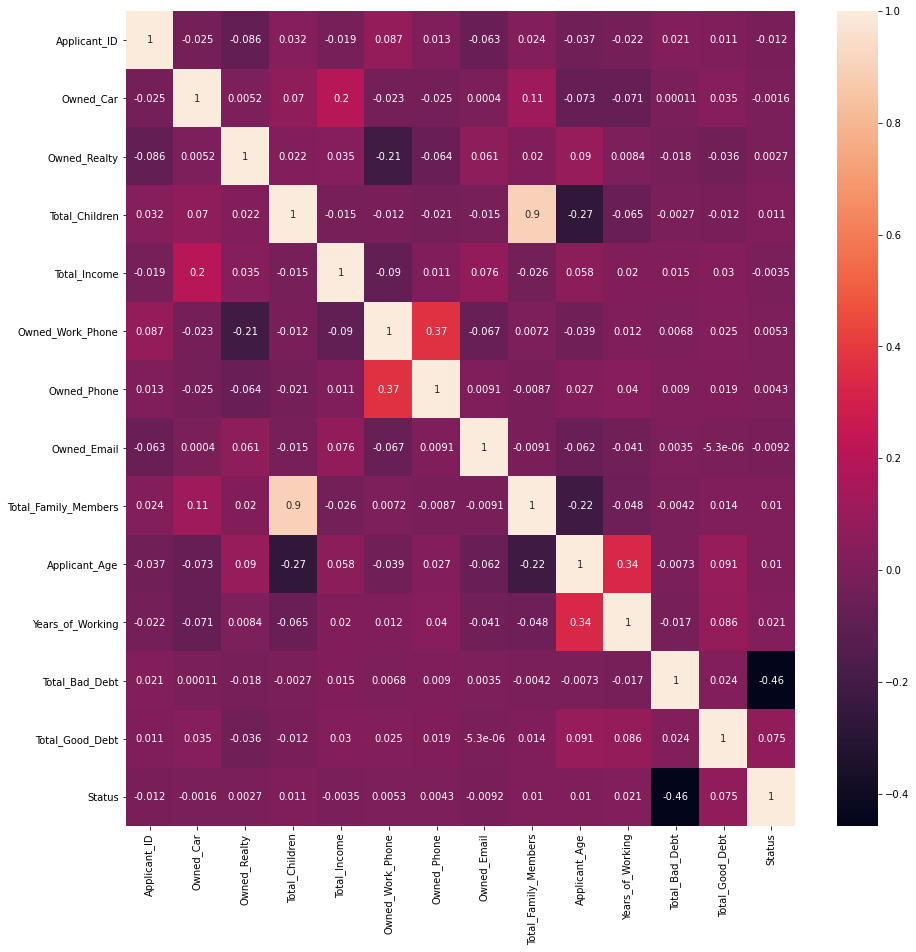

In [99]:
#correlation
data1=data.drop(['Owned_Mobile_Phone'], axis = 1)
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True)
plt.show()

In [100]:
#gender, owned car and bad debt
data.pivot_table(values = 'Total_Bad_Debt', index = 'Applicant_Gender', columns = 'Owned_Car', aggfunc='mean')

Owned_Car,0,1
Applicant_Gender,,
F,0.307865,0.298062
M,0.413287,0.359562


In [101]:
#gender, owned propety and bad debt
data.pivot_table(values = 'Total_Bad_Debt', index = 'Applicant_Gender', columns = 'Owned_Realty', aggfunc='mean')

Owned_Realty,0,1
Applicant_Gender,,
F,0.341779,0.286889
M,0.417024,0.357167


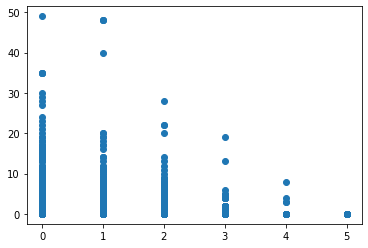

In [102]:
#gender, owned propety and bad debt
plt.scatter(x = data['Total_Children'], y= data['Total_Bad_Debt'])
plt.show()

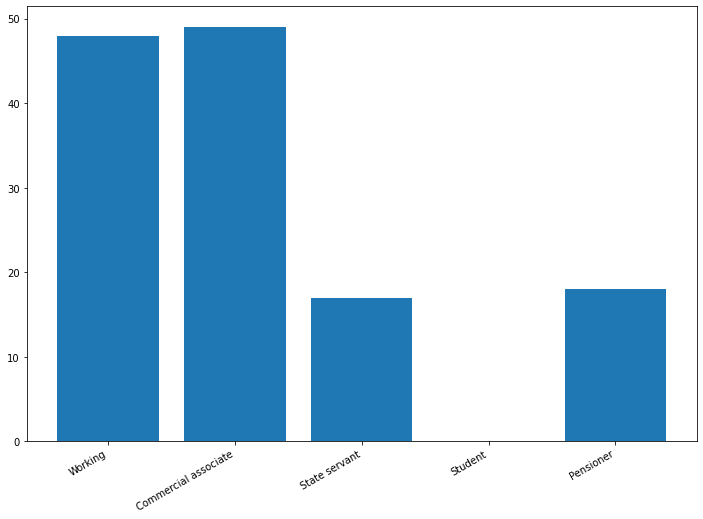

In [105]:
# Income_Type vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Income_Type'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

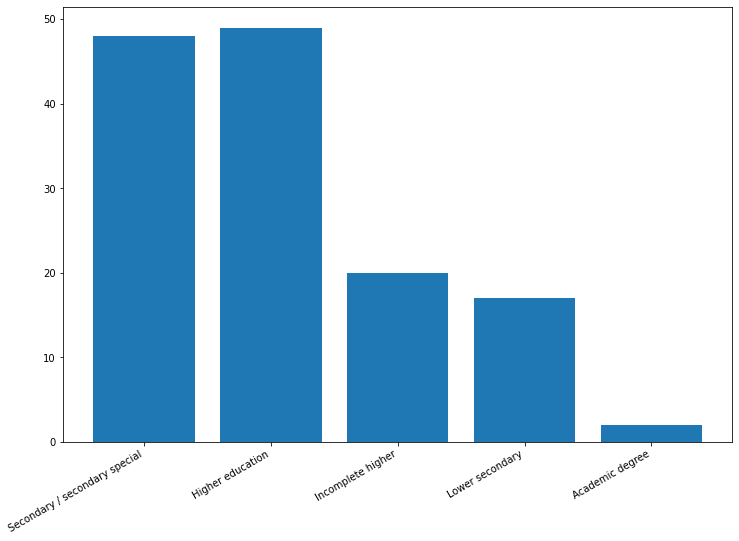

In [106]:
# Education_Type vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Education_Type'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

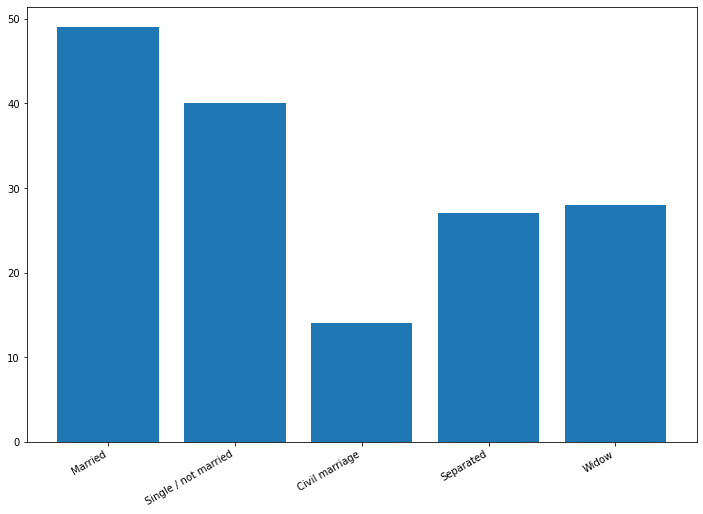

In [107]:
# Family_Status vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Family_Status'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

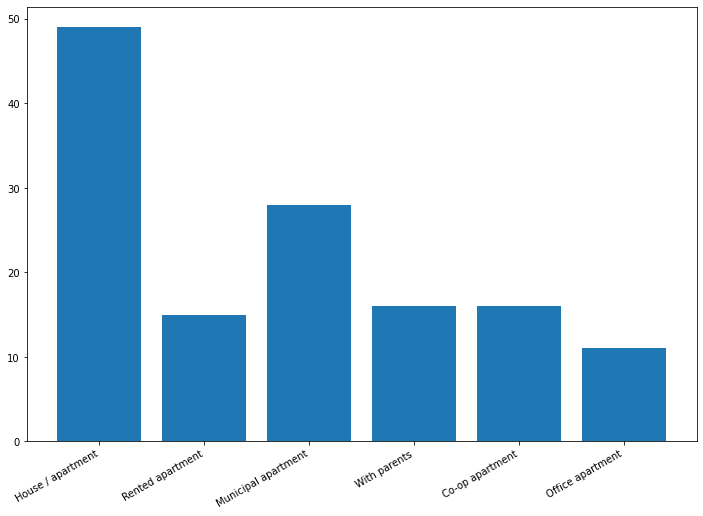

In [108]:
# Housing_Type vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Housing_Type'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

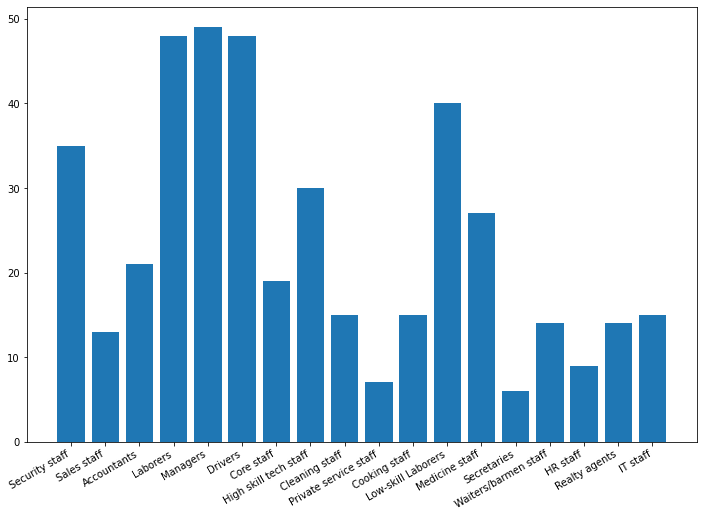

In [109]:
# Job_Title vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Job_Title'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

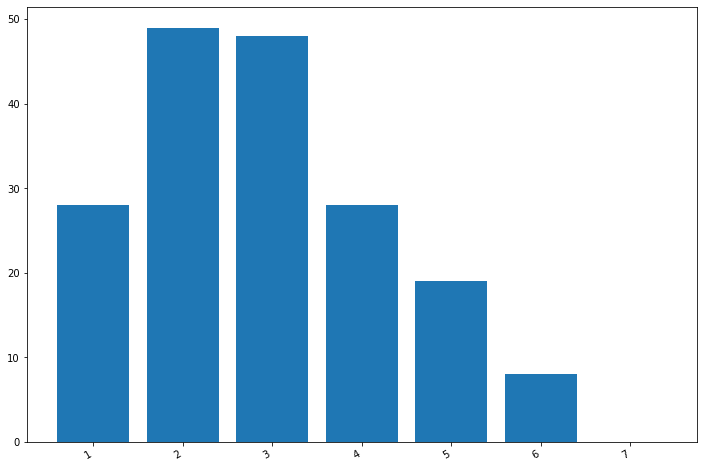

In [110]:
# Total_Family_Members  vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Total_Family_Members'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

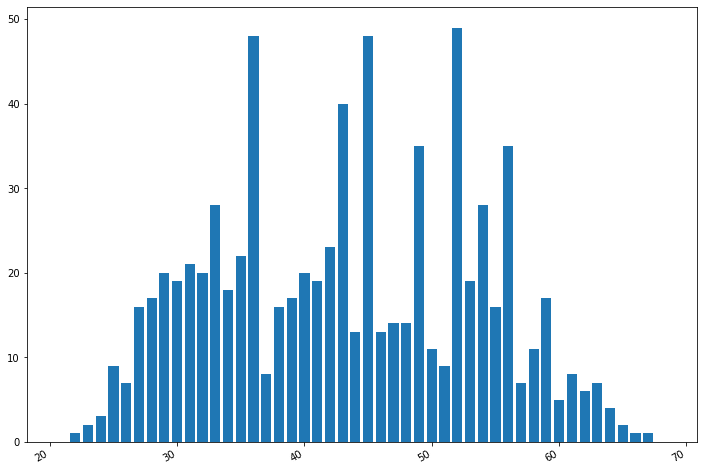

In [111]:
# Applicant_Age vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Applicant_Age'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

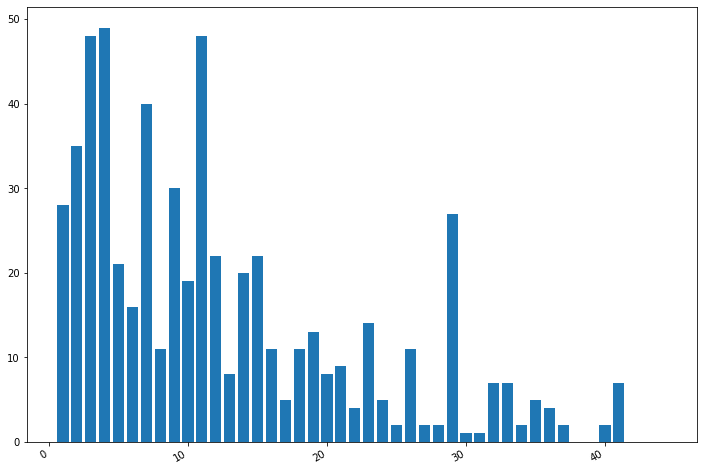

In [112]:
# Years_of_Working vs Total bad debt
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data['Years_of_Working'], data['Total_Bad_Debt'])
plt.xticks(rotation=30, ha='right')
plt.show()

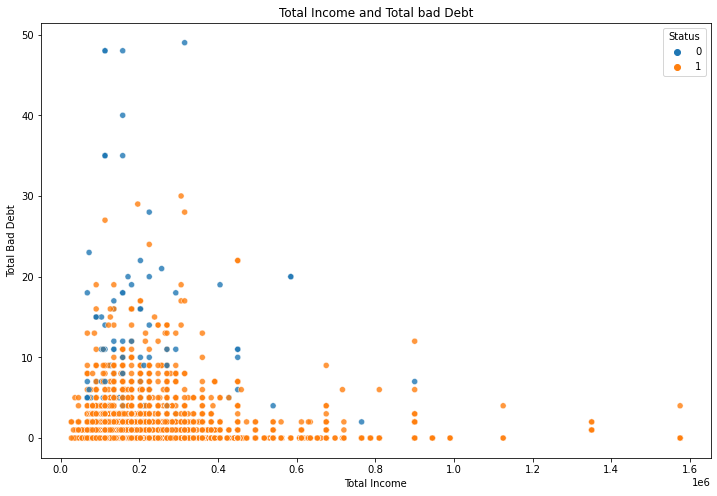

In [90]:
# Total income and total bad debt
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x = data['Total_Income'], y= data['Total_Bad_Debt'], hue = data['Status'], alpha = 0.8)
plt.title('Total Income and Total bad Debt')
plt.xlabel('Total Income')
plt.ylabel('Total Bad Debt')
plt.show()

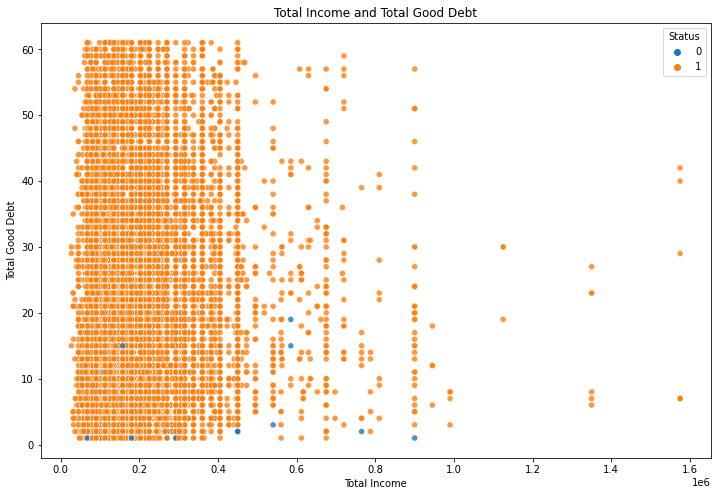

In [91]:
# Total income and total good debt
figure = plt.figure(figsize=(12,8))
sns.scatterplot(x = data['Total_Income'], y= data['Total_Good_Debt'], hue = data['Status'], alpha = 0.8)
plt.title('Total Income and Total Good Debt')
plt.xlabel('Total Income')
plt.ylabel('Total Good Debt')
plt.show()